# 1. Lý thuyết



1)  Đặc diểm của kiến trúc RNN là gì ?

A. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trong tương lai được sử dụng như input của step hiện tại.

B. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện một cách song song và output của các step trước được sử dụng như input của step hiện tại.

**C. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trước được sử dụng như input của step hiện tại.**

D. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo chiều từ phải sang trái cho tới khi trở về vị trí đầu tiên.

2) Nhận định nào sau đây là đúng về RNN?

A. Kiến trúc RNN dự báo song song các output một lúc.

B. Kiến trúc RNN không chia sẻ tham số giữa các units. Do đó kích thước mạng sẽ gia tăng theo độ dài văn bản.

C. Kiến trúc RNN có thể tổng hợp được thông tin trong tương lai để dự báo hiện tại.

**D. Kiến trúc RNN chia sẻ tham số trên toàn bộ các units nên số lượng tham số không phụ thuộc vào độ dài văn bản.**

3) Để huấn luyện mạng RNN thì một chú ý quan trọng tại time step t=0 chúng ta cần làm gì ?

A. Mã hóa từ đầu vào thành một ma trận đại số.

B. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị phân phối xác suất của biến mục tiêu.

**C. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng mã hóa biểu diễn cho từ đầu vào tại bước $t=0$.**

D. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng kích hoạt tính toán.

4) Sự khác biệt giữa RNN và CNN là gì?

**A. RNN là kiến trúc truy hồi có thể trả ra kết quả dự báo ở nhiều timestep. CNN không có khả năng truy hồi để dự báo theo timestep**

B. RNN có tính truy hồi và kiến trúc không chia sẻ tham số giữa các units. Trong khi CNN chia sẻ tham số ở phân phối xác suất đầu ra. 

C. RNN có số lượng tham số thay đổi theo độ dài văn bản. Trong khi đó CNN luôn có số lượng tham số xác định trước.

D. RNN có thể dự báo theo một chiều trong khi CNN chỉ dự báo được theo hai chiều.

5) Véc tơ context trong kiến trúc LSTM và GRU có tác dụng gì ?

A. Là véc tơ biểu diễn của đầu vào $x_t$ tại mỗi bước.

**B. Ghi nhận bối cảnh xuyên suốt toàn bộ chuỗi tính đến thời điểm hiện tại**

C. Là véc tơ cập nhật và loại bỏ thông tin mới tại mỗi bước.

D. Kích hoạt thông tin tại mỗi timestep


# 2. Thực hành

## 6. Từ bộ dữ liệu [Sentiment-analysis-on-movie-reviews](https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data) hãy sử dụng các thuật toán trong RNN để huấn luyện mô hình phân loại cảm xúc văn bản. (1 điểm)



https://www.kaggle.com/code/nikhiln2312/sentiment-rnn

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/DLK1/Sentiment RNN/"
os.chdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DLK1/Sentiment RNN/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/DLK1/Sentiment RNN/test.tsv.zip
/content/drive/MyDrive/DLK1/Sentiment RNN/train.tsv.zip


In [ ]:
train_data = pd.read_csv('train.tsv.zip', sep = '\t')
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
test_data = pd.read_csv('test.tsv.zip',sep = '\t')
test_data.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
print("TF version: ", tf.__version__)
if tf.__version__ < "2.0.0":
    tf.enable_eager_execution()
    print("Eager execution enabled.")
else:
    print("Eager execution enabled by default.")

if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

TF version:  2.8.0
Eager execution enabled by default.
Please install GPU version of TF


In [ ]:
print(train_data.shape)
print(test_data.shape)

(156060, 4)
(66292, 3)


In [ ]:
train_data.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [ ]:
test_data.columns

Index(['PhraseId', 'SentenceId', 'Phrase'], dtype='object')

In [ ]:
print(train_data['Sentiment'].unique())
train_data['Sentiment'].nunique()

[1 2 3 4 0]


5

In [ ]:
train_data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [ ]:
from tqdm import tqdm

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import re

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def sentence_cleaning(df):
    sentence = []
    for sent in tqdm(df['Phrase']):
        
        text = re.sub("[^a-zA-Z]"," ",sent)
        
        word = word_tokenize(text.lower())
        
        lemmatizer = WordNetLemmatizer()
        
        lemm_word = [lemmatizer.lemmatize(i) for i in word]
        
        sentence.append(lemm_word)
    return (sentence)

In [ ]:
train_sent = sentence_cleaning(train_data)
test_sent = sentence_cleaning(test_data)

100%|██████████| 66292/66292 [00:08<00:00, 7411.68it/s]


In [ ]:
from tensorflow.keras.utils import to_categorical
target_col = train_data.Sentiment.values
y_target = to_categorical(target_col)
y_target.shape

(156060, 5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_sent,y_target,test_size = 0.2,stratify = y_target)

In [ ]:
unique_words = set()
max_len = 0
for sent in tqdm(X_train):
    unique_words.update(sent)
    if(max_len < len(sent)):
        max_len = len(sent)
        sentence = sent

100%|██████████| 124848/124848 [00:00<00:00, 341506.79it/s]


In [ ]:
vocabulary = len(list(unique_words))
oov = '<OOV>'
embedding_dim = 300
padding = 'post'
trunc = 'post'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocabulary,oov_token = oov,char_level = False)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,maxlen = max_len,padding=padding,truncating = trunc)
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val,maxlen = max_len,padding=padding,truncating = trunc)
X_test = tokenizer.texts_to_sequences(test_sent)
X_test = pad_sequences(X_test,maxlen = max_len,padding=padding,truncating = trunc)

In [ ]:
print(X_train.shape,X_test.shape,X_val.shape)

(124848, 48) (66292, 48) (31212, 48)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Bidirectional,Activation,Dropout,LSTM,Embedding
from keras.layers.embeddings import Embedding

In [ ]:
model = tf.keras.Sequential()
model.add(Embedding(vocabulary,embedding_dim,input_length = max_len))
model.add(Bidirectional(LSTM(128, dropout = 0.8, recurrent_dropout=0.8, return_sequences=True)))
model.add(Bidirectional(LSTM(128,dropout = 0.5,recurrent_dropout=0.5,return_sequences=False)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 48, 300)           4120500   
                                                                 
 bidirectional (Bidirectiona  (None, 48, 256)          439296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 3

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_data = (X_val, y_val),epochs = 2,batch_size = 256,verbose = 1)

Epoch 1/2
488/488 [==============================] - 1566s 3s/step - loss: 1.0601 - accuracy: 0.5805 - val_loss: 0.8800 - val_accuracy: 0.6408
Epoch 2/2
488/488 [==============================] - 1618s 3s/step - loss: 0.8581 - accuracy: 0.6538 - val_loss: 0.8429 - val_accuracy: 0.6523


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis = -1)
submission_df = pd.DataFrame({'PhraseId': test_data.PhraseId, 'Sentiment': y_pred})

##7. Sử dụng mô hình LSTM để dự báo tổng số lượng khách hàng sử dụng dịch vụ hàng không [air- passengers](https://www.kaggle.com/datasets/rakannimer/air-passengers) (2 điểm)



https://www.kaggle.com/code/ehsandahesh/air-passengers-predicting-with-rnn-lstm

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential



In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/DLK1/Air Passengers/"
os.chdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Xử lý dữ liệu

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.columns = ['Date', 'Passengers']
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.isnull().mean()

Passengers    0.0
dtype: float64

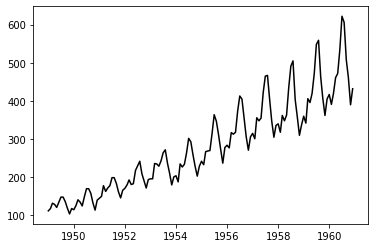

In [ ]:
plt.plot(data, color='black')
plt.show()

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
data['Passengers'] = scaler.fit_transform(data['Passengers'].values.reshape(-1,1))
data.head()

,Passengers
Date,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819


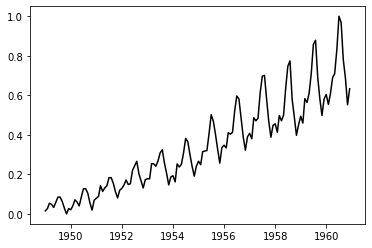

In [ ]:
plt.plot(data, color='black')
plt.show()

In [ ]:
def load_data(data, seq_len):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
    return x,y

In [ ]:
x, y = load_data(data, 20)

In [ ]:
data.shape

(144, 1)

In [ ]:
num = int(len(data['Passengers'])*0.8)
num

115

In [ ]:
x_train = x[:num]
y_train = y[:num]
x_test = x[num:]
y_test = y[num:]

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train = np.reshape(x_train, (num, 20, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 20, 1))

In [ ]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (115, 20, 1)
y_train.shape =  (115,)
x_test.shape =  (9, 20, 1)
y_test.shape =  (9,)


In [ ]:
x_train.shape =  (115, 20, 1)
y_train.shape =  (115,)
x_test.shape =  (9, 20, 1)
y_test.shape =  (9,)

Xây dựng mô hình

In [ ]:
lstmModel = Sequential()
lstmModel.add(LSTM(100, activation="ReLU", return_sequences=True, input_shape=(x_train.shape[1], 1)))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(80, activation="ReLU", return_sequences=True))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(50, activation="ReLU", return_sequences=True))
lstmModel.add(Dropout(0.2))
lstmModel.add(LSTM(30, activation="ReLU"))
lstmModel.add(Dense(1))
lstmModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20, 100)           40800     
                                                                 
 dropout_1 (Dropout)         (None, 20, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 20, 80)            57920     
                                                                 
 dropout_2 (Dropout)         (None, 20, 80)            0         
                                                                 
 lstm_4 (LSTM)               (None, 20, 50)            26200     
                                                                 
 dropout_3 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 30)               

In [ ]:
lstmModel.compile(optimizer="adam", loss="MSE")
lstmModel.fit(x_train, y_train, epochs=2, batch_size=50)

Epoch 1/2
3/3 [==============================] - 30s 53ms/step - loss: 0.1439
Epoch 2/2
3/3 [==============================] - 0s 55ms/step - loss: 0.1050


In [ ]:
lstmPredict = lstmModel.predict(x_test)
lstmScore = r2_score(y_test, lstmPredict)
print("R2 Score : ", lstmScore)

R2 Score :  -14.576236804518429


In [ ]:
def plot_predictions(test, predicted, title, x):
    plt.figure(figsize=(16,4))
    plt.plot(x ,test, color='blue',label='Actual')
    plt.plot(x ,predicted, alpha=0.7, color='red',label='Predict')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend()
    plt.show()

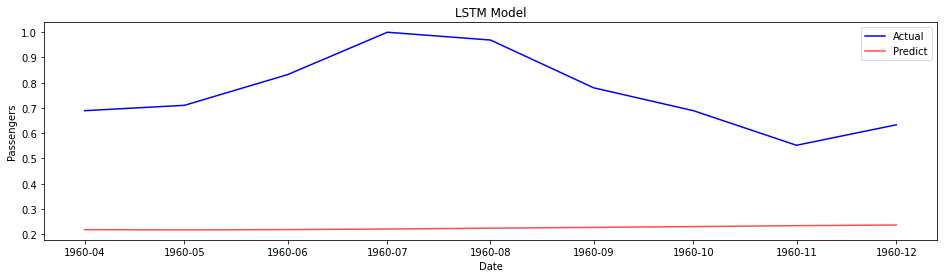

In [ ]:
plot_predictions(y_test, lstmPredict, "LSTM Model", data.index[-9:])

##8. Xây dựng một mô hình thêm dấu Tiếng Việt sử dụng LSTM. Cách xử lý để tạo bộ dữ liệu có thể tham khảo tại [them dau tieng viet](https://phamdinhkhanh.github.io/2020/05/28/TransformerThemDauTV.html#1-d%E1%BB%AF-li%E1%BB%87u). (2 điểm)

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/DLK1/TrainTViet/"
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
!wget https://dumps.wikimedia.org/viwiki/20200501/viwiki-20200501-pages-articles.xml.bz2
!bzip2 -d viwiki-20200501-pages-articles.xml.bz2
!ls

--2022-04-03 07:57:19--  https://dumps.wikimedia.org/viwiki/20200501/viwiki-20200501-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-04-03 07:57:20 ERROR 404: Not Found.

bzip2: Can't open input file viwiki-20200501-pages-articles.xml.bz2: No such file or directory.
test_tv_idx_50k.pkl   train_tv_idx_500k.pkl  wikiextractor
train_tieng_viet.txt  val_tv_idx_50k.pkl


In [ ]:
!git clone https://github.com/attardi/wikiextractor.git


fatal: destination path 'wikiextractor' already exists and is not an empty directory.


In [ ]:
!python wikiextractor/WikiExtractor.py viwiki-20200501-pages-articles.xml.bz2 --processes 4 -o ./

In [ ]:
import string
import re
# https://realpython.com/python-encodings-guide/
# List các ký tự hợp lệ trong tiếng Việt
intab_l = "ạảãàáâậầấẩẫăắằặẳẵóòọõỏôộổỗồốơờớợởỡéèẻẹẽêếềệểễúùụủũưựữửừứíìịỉĩýỳỷỵỹđ"
ascii_lowercase = 'abcdefghijklmnopqrstuvwxyz'
digits = '0123456789'
punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
whitespace = ' '
accept_strings =  intab_l + ascii_lowercase + digits + punctuation + whitespace
r = re.compile('^[' + accept_strings + ']+$')


# Một câu sẽ được coi là hợp lệ nếu có các ký tự nằm trong accept_strings
def _check_tieng_viet(seq):
  if re.match(r, seq.lower()):
    return True
  else:
    return False

_check_tieng_viet('tiếng việt là ngôn ngữ của tôi')

True

In [ ]:
import pickle
import json
from tqdm import tqdm
import glob2
idx = 0

for path in tqdm(glob2.glob('output/*/*')):
  # Đọc nội dung của các văn bản từ folder output. Content sẽ chứa nhiều row, mỗi row là một json data
  with open(path, 'r', encoding='utf8') as f:
    content = f.readlines()
    for row in content:
      # Convert row sang json
      art_json = json.loads(row)
      # Lấy nội dung văn bản
      art_cont = art_json['text']
      art_cont = re.sub("(\s)+", r"\1", art_cont)
      # Chia văn bản thành các câu tại vị trí xuống dòng
      art_seqs = art_cont.split("\n")
      # Lưu các dòng là tiếng việt vào file 'train_tieng_viet.txt'.
      # Mỗi dòng có định dạng: index{10digits} sequence
      for seq in art_seqs:
        if _check_tieng_viet(seq):
          idx_str = str(idx).zfill(10)
          with open('train_tieng_viet.txt', 'a') as f:
            f.writelines([idx_str+'\t', seq+'\n'])
          idx += 1

0it [00:00, ?it/s]


In [ ]:
with open('train_tieng_viet.txt', 'r', encoding='utf-8') as f:
  train_output = f.readlines()

print('Number of sequences: ', len(train_output))
print('First sequence: ', train_output[0])

Number of sequences:  3624432
First sequence:  0000000000	Trang Chính



In [ ]:
# encoding=utf8
import codecs
import csv
import re
import sys

def remove_tone_line(utf8_str):
    intab_l = "ạảãàáâậầấẩẫăắằặẳẵóòọõỏôộổỗồốơờớợởỡéèẻẹẽêếềệểễúùụủũưựữửừứíìịỉĩýỳỷỵỹđ"
    intab_u = "ẠẢÃÀÁÂẬẦẤẨẪĂẮẰẶẲẴÓÒỌÕỎÔỘỔỖỒỐƠỜỚỢỞỠÉÈẺẸẼÊẾỀỆỂỄÚÙỤỦŨƯỰỮỬỪỨÍÌỊỈĨÝỲỶỴỸĐ"
    intab = list(intab_l+intab_u)

    outtab_l = "a"*17 + "o"*17 + "e"*11 + "u"*11 + "i"*5 + "y"*5 + "d"
    outtab_u = "A"*17 + "O"*17 + "E"*11 + "U"*11 + "I"*5 + "Y"*5 + "D"
    outtab = outtab_l + outtab_u
    # Khởi tạo regex tìm kiếm các vị trí nguyên âm có dấu 'ạ|ả|ã|...'
    r = re.compile("|".join(intab))

    # Dictionary có key-value là từ có dấu-từ không dấu. VD: {'â' : 'a'}
    replaces_dict = dict(zip(intab, outtab))
    # Thay thế các từ có dấu xuất hiện trong tìm kiếm của regex bằng từ không dấu tương ứng
    non_dia_str = r.sub(lambda m: replaces_dict[m.group(0)], utf8_str)
    return non_dia_str
  
remove_tone_line('Đi một ngày đàng học 1 sàng khôn')

'Di mot ngay dang hoc 1 sang khon'

In [ ]:
from tqdm import tqdm
train_idx_500k = []
train_opt_500k = []
train_ipt_500k = []
val_idx_50k = []
val_opt_50k = []
val_ipt_50k = []
test_idx_50k = []
test_opt_50k = []
test_ipt_50k = []

for i in tqdm(range(600000)):
  [idx, origin_seq] = train_output[i].split('\t')
  try:
    non_acc_seq = remove_tone_line(origin_seq)
  except:
    print('error remove tone line at sequence {}', str(i))
    next
  if i < 500000:
    train_idx_500k.append(idx)
    train_opt_500k.append(origin_seq)
    train_ipt_500k.append(non_acc_seq)
  elif i < 550000:
    val_idx_50k.append(idx)
    val_opt_50k.append(origin_seq)
    val_ipt_50k.append(non_acc_seq)
  else:
    test_idx_50k.append(idx)
    test_opt_50k.append(origin_seq)
    test_ipt_50k.append(non_acc_seq)

100%|██████████| 600000/600000 [00:27<00:00, 21772.06it/s]


In [ ]:
print(train_ipt_500k[10])
print(train_opt_500k[10])


Tieng Viet la ngon ngu co nguon goc ban dia, xuat than tu nen van minh nong nghiep, tai noi ma ngay nay la khu vuc phia bac luu vuc song Hong va song Ma cua Viet Nam.

Tiếng Việt là ngôn ngữ có nguồn gốc bản địa, xuất thân từ nền văn minh nông nghiệp, tại nơi mà ngày nay là khu vực phía bắc lưu vực sông Hồng và sông Mã của Việt Nam.



In [ ]:
import pickle

def _save_pickle(filename, obj):
  with open(filename, 'wb') as f:
    pickle.dump(obj, f)

_save_pickle('train_tv_idx_500k.pkl', train_idx_500k)
_save_pickle('val_tv_idx_50k.pkl', val_idx_50k)
_save_pickle('test_tv_idx_50k.pkl', test_idx_50k)
